In [1]:
# Python ≥3.5 is required
import sys
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
titanic= sns.load_dataset("titanic")

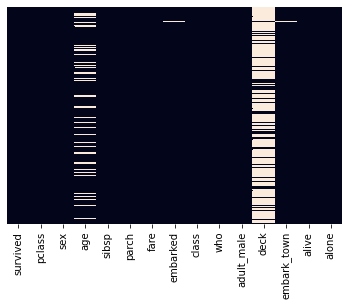

In [3]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


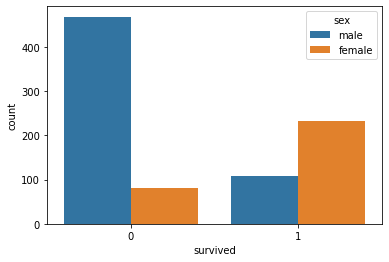

In [8]:
sns.countplot(x="survived", hue="sex", data=titanic)

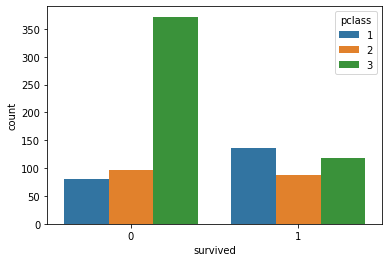

In [9]:
sns.countplot(x="survived", hue="pclass", data=titanic)

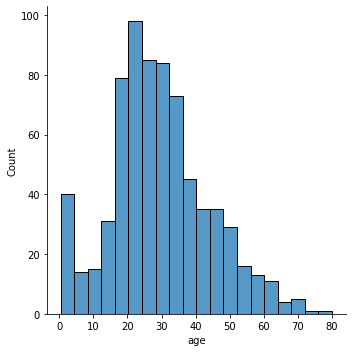

In [10]:
sns.displot(titanic['age'].dropna())

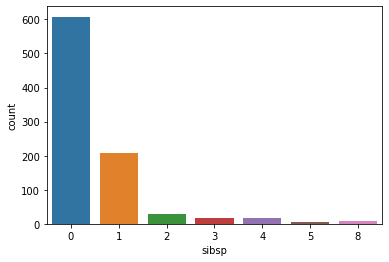

In [11]:
sns.countplot(x='sibsp',data=titanic )

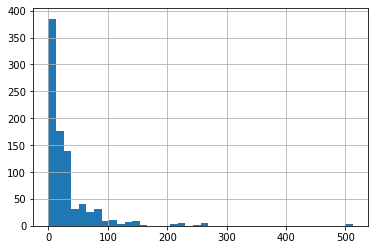

In [12]:
titanic['fare'].hist(bins=40)

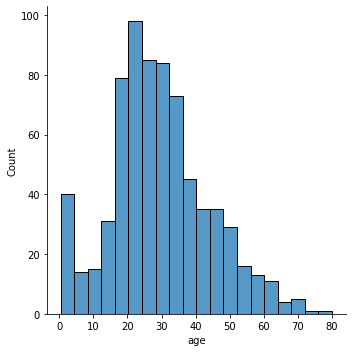

In [13]:
sns.displot(titanic['age'].dropna())

data cleaning

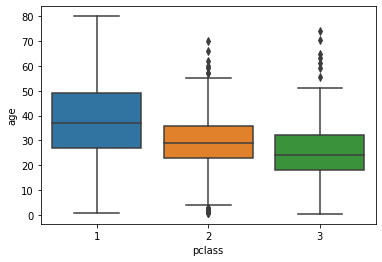

In [14]:
sns.boxplot(x="pclass",y="age",data=titanic)

In [15]:
def impute_age(cols):
  age= cols[0]
  pclass=cols[1]
  if pd.isnull(age):
    if pclass ==1:
      return 37
    elif pclass ==2:
      return 29
    else:
      return 24
  else:
    return age

In [16]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
titanic['age'] = titanic[['age','pclass']].apply(impute_age,axis=1)

In [18]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
titanic.drop(['deck','class','embark_town','alive','alone','adult_male','who'],axis=1, inplace=True)

In [20]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [21]:
titanic.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [22]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [23]:
#titanic.drop(["deck","embark_town","alive","alone",'adult_male','who'], axis=1,inplace=True)
titanic.dropna(inplace=True)

In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    object 
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [25]:
sex= pd.get_dummies(titanic['sex'],drop_first=True)
embark= pd.get_dummies(titanic['embarked'],drop_first=True)

In [26]:
titanic['embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: object

In [27]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [28]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
titanic.drop(['sex','embarked'], axis=1, inplace=True)

In [30]:
titanic=pd.concat([titanic,sex,embark],axis=1)

In [31]:
titanic

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [32]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


**Splitting the data**

In [33]:
from sklearn.model_selection import train_test_split


In [34]:
X=titanic.drop('survived',axis=1)
y=titanic.survived

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

**Logistic Regression**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [38]:
logregmodel=LogisticRegression(solver='liblinear')


In [39]:
logregmodel.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
prediction=logregmodel.predict(X_test)


In [41]:
score=cross_val_score(logregmodel,X_train,y_train,cv=5)
print("Score:",score)


Score: [0.7752809  0.78651685 0.83146067 0.79775281 0.77272727]


In [42]:
log_acc = round(logregmodel.score(X_train,y_train) * 100, 2)
log_acc

80.18

evaluation

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       265
           1       0.83      0.72      0.77       180

    accuracy                           0.82       445
   macro avg       0.83      0.81      0.81       445
weighted avg       0.82      0.82      0.82       445



**DecisionTreeClassifier**


training

In [45]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [46]:
desclr=DecisionTreeClassifier()
desclr.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

prediction

In [47]:
prediction_desclr=desclr.predict(X_test)


In [48]:
score=cross_val_score(desclr,X_train,y_train,cv=5)
print("Score:",score)


Score: [0.7752809  0.80898876 0.80898876 0.79775281 0.75      ]


In [49]:
desclr_acc = round(desclr.score(X_train,y_train) * 100, 2)
desclr_acc

99.1

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_desclr))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       265
           1       0.69      0.73      0.71       180

    accuracy                           0.76       445
   macro avg       0.75      0.76      0.75       445
weighted avg       0.76      0.76      0.76       445

